In [ ]:
'''delete this cell '''

# import torch
# import cv2
# model = torch.hub.load('ultralytics/yolov5', 'custom','yolov5s.pt')
# cap =  cv2.VideoCapture('sample 2.mp4')
# ret,frame = cap.read()
# while(ret):
#     ret,frame = cap.read()
#     results = model(frame)
#     #results.print()
#     #print(results.xyxy[0])
#     df = results.pandas().xyxy[0]
#     df = df[df['name'].isin(["car","truck",'bike'])]
#     xmin = df['xmin'].values
#     ymin = df['ymin'].values
#     xmax = df['xmax'].values
#     ymax = df['ymax'].values
#     name = df['name'].values
#     vhcont = len(name)
#     for(x1,y1,x2,y2,objectname) in zip(xmin,ymin,xmax,ymax,name):
#         cv2.rectangle(frame,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),2)
#         cv2.putText(frame,objectname,(int(x1),int(y1)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    
#     cv2.putText(frame,str(vhcont),(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

#     cv2.imshow('frame',frame)
#     if cv2.waitKey(10)&0xFF == ord('q'):
#         break


# cv2.destroyAllWindows()
# cap.release()
# #results.xyxy[0]  
 

Using cache found in C:\Users\LENOVO/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-1 torch 1.10.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('Dataset_new.csv')
df1.head()

,TEMP,REL HUMIDITY,DEW POINT,CO2,CH4,SO2,NH3,O3,O2,windspeed,PM 2_5,PM_10,Avg_AQI,pm>105,WS>0.4495,SMOG_STATUS
0,28.07,72.65,19.25,0.1773,1.2364,0.6928,0.6665,1.1637,0.0268,1.2122,1.0827,164,26.274200,True,True,False
1,28.73,69.86,19.24,0.1690,1.2452,0.6932,0.6682,1.8650,0.0270,1.1926,1.2122,173,26.973618,True,True,True
2,28.78,69.81,19.27,0.1716,1.2478,0.6896,0.6720,1.5862,0.0270,1.1836,1.1926,173,26.949709,True,True,True
3,28.78,69.75,19.26,0.1689,1.2478,0.6890,0.6685,1.4813,0.0270,1.1751,1.1836,173,26.932373,True,True,True
4,28.82,69.67,19.27,0.1703,1.2461,0.6938,0.6713,1.3488,0.0270,1.1734,1.1751,172,26.826582,True,True,True


In [ ]:
df1.dropna(inplace=True)
df1.head()

,TEMP,REL HUMIDITY,DEW POINT,CO2,CH4,SO2,NH3,O3,O2,windspeed,PM 2_5,PM_10,Avg_AQI,pm>105,WS>0.4495,SMOG_STATUS
0,28.07,72.65,19.25,0.1773,1.2364,0.6928,0.6665,1.1637,0.0268,1.2122,1.0827,164,26.274200,True,True,False
1,28.73,69.86,19.24,0.1690,1.2452,0.6932,0.6682,1.8650,0.0270,1.1926,1.2122,173,26.973618,True,True,True
2,28.78,69.81,19.27,0.1716,1.2478,0.6896,0.6720,1.5862,0.0270,1.1836,1.1926,173,26.949709,True,True,True
3,28.78,69.75,19.26,0.1689,1.2478,0.6890,0.6685,1.4813,0.0270,1.1751,1.1836,173,26.932373,True,True,True
4,28.82,69.67,19.27,0.1703,1.2461,0.6938,0.6713,1.3488,0.0270,1.1734,1.1751,172,26.826582,True,True,True


In [ ]:
df1_1 = df1[['SO2','NH3','O3','PM 2_5','PM_10','Avg_AQI']]
df1_1.head()

,SO2,NH3,O3,PM 2_5,PM_10,Avg_AQI
0,0.6928,0.6665,1.1637,1.0827,164,26.274200
1,0.6932,0.6682,1.8650,1.2122,173,26.973618
2,0.6896,0.6720,1.5862,1.1926,173,26.949709
3,0.6890,0.6685,1.4813,1.1836,173,26.932373
4,0.6938,0.6713,1.3488,1.1751,172,26.826582


In [ ]:
for cols in df1_1.columns.tolist()[1:]:
    df1_1 = df1_1[df1_1[cols] > 0]

In [ ]:
df2 = pd.read_csv('./city_day.csv')
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## Rourkela PLOT 

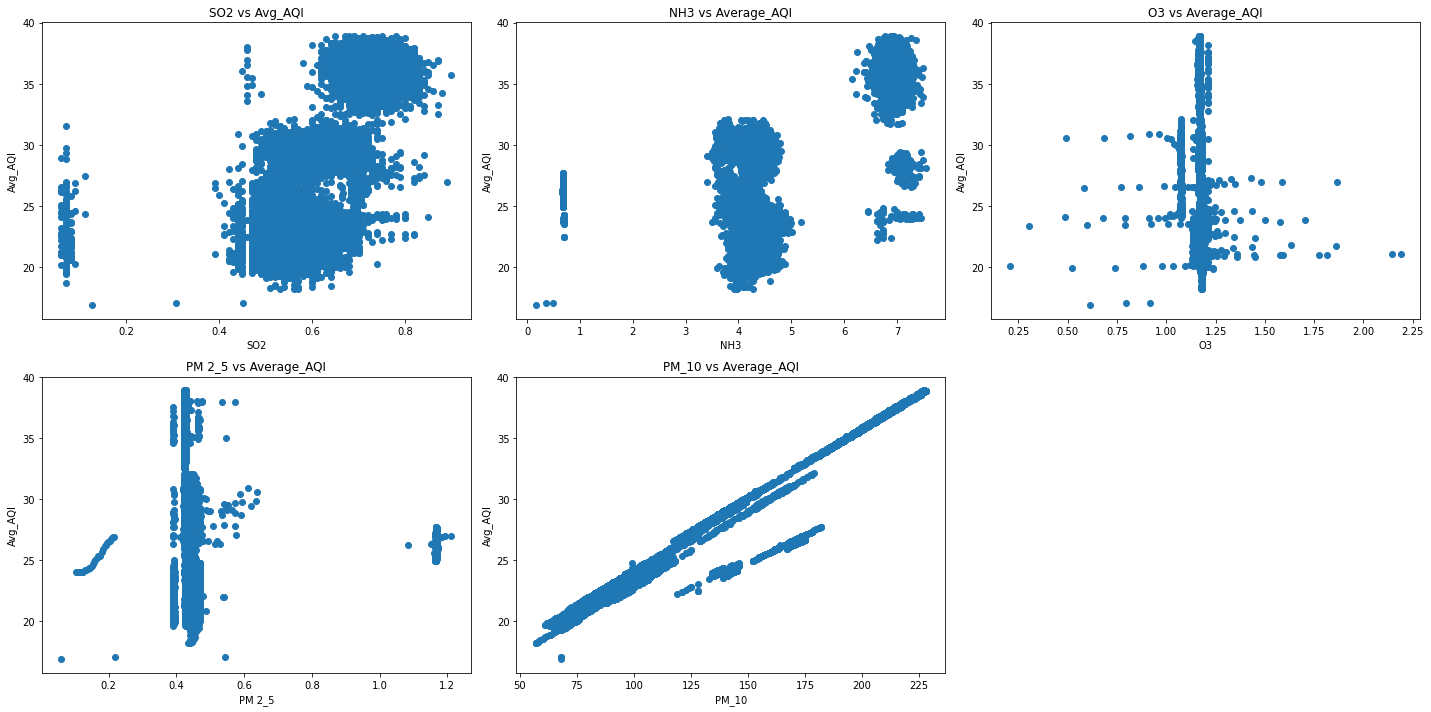

In [ ]:

plt.figure(figsize=(20,10))

plt.subplot(231)
plt.scatter(df1_1['SO2'],df1_1['Avg_AQI'])
plt.xlabel('SO2')
plt.ylabel('Avg_AQI')
plt.title('SO2 vs Avg_AQI')
plt.subplot(232)
plt.scatter(df1_1['NH3'],df1_1['Avg_AQI'])
plt.xlabel('NH3')
plt.ylabel('Avg_AQI')
plt.title('NH3 vs Average_AQI')
plt.subplot(233)
plt.scatter(df1_1['O3'],df1_1['Avg_AQI'])
plt.xlabel('O3')
plt.ylabel('Avg_AQI')
plt.title('O3 vs Average_AQI')
plt.subplot(234)
plt.scatter(df1_1['PM 2_5'],df1_1['Avg_AQI'])
plt.xlabel('PM 2_5')
plt.ylabel('Avg_AQI')
plt.title('PM 2_5 vs Average_AQI')
plt.subplot(235)
plt.scatter(df1_1['PM_10'],df1_1['Avg_AQI'])
plt.xlabel('PM_10')
plt.ylabel('Avg_AQI')
plt.title('PM_10 vs Average_AQI')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVR

In [ ]:
X  = df1_1[['SO2','NH3','O3','PM 2_5','PM_10']].values

In [ ]:
y1 = df1_1['Avg_AQI'].values
y1 = y1.reshape(-1,1)
y=y1



In [ ]:
model = SVR()

model.fit(X,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print(r2_score(y,model.predict(X)))
print(mean_squared_error(y,model.predict(X))**0.5)


0.9688737390695543
0.9859178086358166
